In [6]:
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, project_root)


from src.pi_mc import estimate_pi
import numpy as np

rng = np.random.default_rng(42)

for N in [1_000, 10_000, 100_000]:
    pi_hat, se = estimate_pi(N, rng)
    print(f"N={N:6d}  pi_hat={pi_hat:.6f}  SE≈{se:.6f}")


Implementiere deinen Pi-Schätzer hier!
N=  1000  pi_hat=3.148000  SE≈0.051789
N= 10000  pi_hat=3.136400  SE≈0.016458
N=100000  pi_hat=3.136920  SE≈0.005203


In [7]:
ss = np.random.SeedSequence(42)
child_seeds = ss.spawn(20)
rngs = [np.random.default_rng(s) for s in child_seeds]


In [8]:
import numpy as np
from src.pi_mc import estimate_pi

# Parameters
Ns = [1_000, 10_000, 100_000]
R = 20

# Seed strategy: one main seed → multiple independent seeds
main_seed = 12345
ss = np.random.SeedSequence(main_seed)
child_seeds = ss.spawn(R)
rngs = [np.random.default_rng(s) for s in child_seeds]

# Dictionary to store results
pi_results = {}

for N in Ns:
    estimates = []
    for r in range(R):
        pi_hat, se = estimate_pi(N, rngs[r])
        estimates.append(pi_hat)
    pi_results[N] = np.array(estimates)

pi_results


{1000: array([3.156, 3.144, 3.2  , 2.988, 3.272, 3.2  , 3.068, 3.1  , 3.144,
        3.192, 3.104, 3.052, 3.148, 3.156, 3.124, 3.092, 3.184, 3.148,
        3.108, 3.128]),
 10000: array([3.11  , 3.1336, 3.1476, 3.1632, 3.1548, 3.1528, 3.1152, 3.1552,
        3.1452, 3.1448, 3.1432, 3.1612, 3.1536, 3.1492, 3.1176, 3.152 ,
        3.1412, 3.1184, 3.1272, 3.1408]),
 100000: array([3.14124, 3.15156, 3.14044, 3.13128, 3.1436 , 3.13288, 3.13824,
        3.14504, 3.14984, 3.13216, 3.14324, 3.13256, 3.13668, 3.136  ,
        3.1472 , 3.14504, 3.14228, 3.13912, 3.14192, 3.14688])}

In [9]:
import numpy as np

R = 20
z = 1.96   # 95% Normal-approx quantile

summary = []

for N, values in pi_results.items():
    mean_pi = values.mean()
    sd_pi = values.std(ddof=1)               # empirical SD over 20 replications
    se_mean = sd_pi / np.sqrt(R)             # SE of the mean (NOT of π_i)
    ci_lower = mean_pi - z * se_mean
    ci_upper = mean_pi + z * se_mean

    summary.append([N, mean_pi, sd_pi, se_mean, ci_lower, ci_upper])

# Display results as a table
import pandas as pd
df_summary = pd.DataFrame(summary, columns=[
    "N",
    "Mean π̂",
    "SD across π̂ (empirical)",
    "SE of mean π̂",
    "95% CI lower",
    "95% CI upper"
])
df_summary


,N,Mean π̂,SD across π̂ (empirical),SE of mean π̂,95% CI lower,95% CI upper
0,1000,3.13540,0.061631,0.013781,3.108389,3.162411
1,10000,3.14134,0.015874,0.003550,3.134383,3.148297
2,100000,3.14086,0.005957,0.001332,3.138249,3.143471


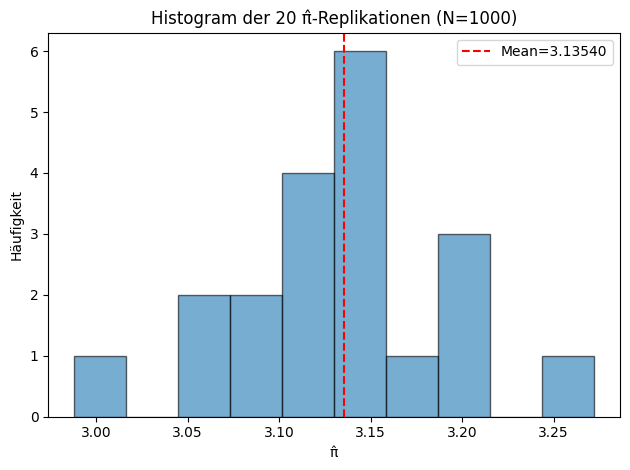

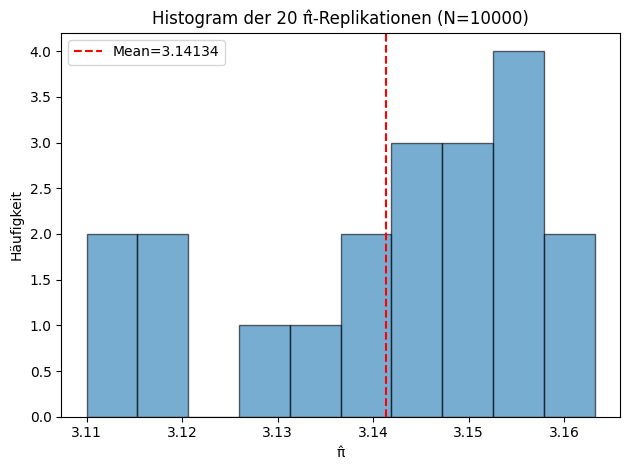

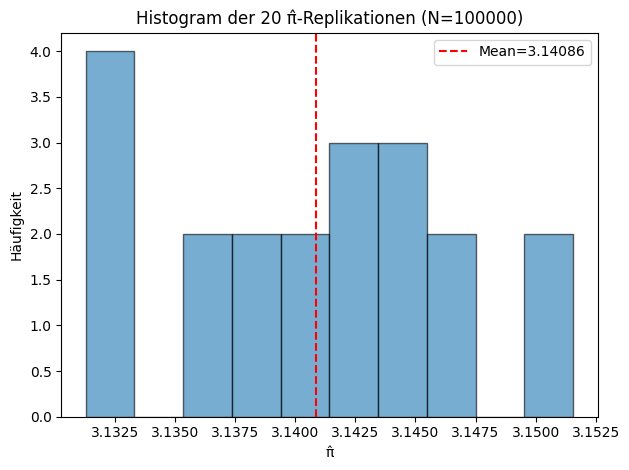

In [12]:
import matplotlib.pyplot as plt
import os

# Ensure the folder exists
os.makedirs("figures", exist_ok=True)

for N, values in pi_results.items():
    out_prefix = f"figures/pi_hist_{N}"
    
    # Histogram
    plt.hist(values, bins=10, edgecolor="k", alpha=0.6)
    plt.axvline(values.mean(), color="red", linestyle="--",
                label=f"Mean={values.mean():.5f}")
    
    # Labels & title
    plt.title(f"Histogram der 20 π̂-Replikationen (N={N})")
    plt.xlabel("π̂")
    plt.ylabel("Häufigkeit")
    plt.legend()
    
    # SAVE the figure
    filename = f"figures/pi_hist_{N}.png"
    plt.tight_layout()
    plt.savefig(filename, dpi=150)
    
    
    out_prefix = f"figures/pi_hist_{N})"
    
    # Show inside notebook
    plt.show()
